In [1]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, Symbol, symbols
from sympy import simplify, expand, collect, solve, solveset, zeros, ones
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.plotting.plot import plot3d
import matplotlib.pyplot as plt
from IPython.display import Latex

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Поверхности второго порядка
**Уравнение поверхности второго порядка:**
$$
a_{11}x^2+a_{22}y^2+a_{33}z^2+2a_{12}xy+2a_{13}xz+2a_{23}yz+2a_{14}x+2a_{24}y+2a_{34}z+a_{44}=0
$$
В матричном виде:
$$
X^TAX+2bX+c=0,
\quad X=\left(\begin{matrix}x\\y\\z\end{matrix}\right),\quad  A=\left(\begin{matrix}a_{11}&a_{12}&a_{13}\\a_{12}&a_{22}&a_{23}\\a_{13}&a_{23}&a_{33}\end{matrix}\right),
\quad b=\left(\begin{matrix}a_{14}&a_{24}&a_{34}\end{matrix}\right),\quad c=a_{44}
$$
или
$$
X_1^TA_1X_1=0,\quad X_1=\left(\begin{matrix}x\\y\\z\\1\end{matrix}\right), A_1=\left(\begin{matrix}a_{11}&a_{12}&a_{13}&a_{14}\\a_{12}&a_{22}&a_{23}&a_{24}\\a_{13}&a_{23}&a_{33}&a_{34}\\a_{14}&a_{23}&a_{33}&a_{44}\end{matrix}\right)
$$
### Пример 1.
Записать уравнение поверхности второго порядка $x^2-2y^2-z^2+2xy+4xz+6x-8y+4z-12=0$ в матричном виде двумя способами.

Вначале построим матрицу $A$ квадратичной формы, входящей в уравнение, и вектор $b$: 
$$
A=\left(\begin{matrix}1&1&2\\1&-2&0\\2&0&-1\end{matrix}\right),\quad b=\left(\begin{matrix}3&-4&2\end{matrix}\right)
$$
Проверим, что эта матрица задает нашу поверхность второго порядка, для этого вычислим
$$
X^TAX+2bX+c=0,\quad X=\left(\begin{matrix}x\\y\\z\end{matrix}\right), \quad c=-12
$$

In [2]:
from sympy.abc import x, y, z
A1 = Matrix(((1, 1, 2),
            (1, -2, 0),
            (2, 0, -1)))
b1 = Matrix((3, -4, 2)).T
c1 = -12
X = Matrix((x, y, z))
u1 = X.T * A1 * X
v1 = b1 * X
display(Latex(f'A = {latex(A1)},\\\\X^TAX = {latex(u1)},\\\\bX = {latex(v1)}'))
expr1 = (u1[0] + 2 * v1[0] + c1).expand().simplify()
display(Latex(f'Уравнение\ поверхности:\ {latex(Eq(expr1, 0))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Теперь составим расширенную матрицу $A_{new}$ и проверим, что получилось то же самое уравнение:

In [3]:
A1_new = A1.row_join(b1.T).col_join(b1.row_join(Matrix((c1,)))) # (c1,) - tuple, состоящий из одного элемента
display(Latex(f'A_{{new}} = {latex(A1_new)}'))
X1 = X.col_join(Matrix((1,)))
expr2 = (X1.T * A1_new * X1)[0].expand().simplify()
display(Latex(f'Уравнение\ поверхности:\ {latex(Eq(expr2, 0))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Классификация поверхностей второго порядка

Для классификации поверхностей второго порядка нужно привести их уравнение  к каноническому виду, переходя к базису из собственных векторов или выделяя полные квадраты.

**15 типов поверхностей второго порядка:**

1. **Эллипсоид**
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2}=1
$$
2. **Однополостной гиперболоид** 
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}-\frac{z^2}{c^2}=1
$$
3. **Двуполостной гиперболоид** 
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}-\frac{z^2}{c^2}=-1
$$
4. **Конус**
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}-\frac{z^2}{c^2}=0
$$
5. **Эллиптический параболоид**
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}=2z
$$
6. **Гиперболический параболоид**
$$
\frac{x^2}{a^2}-\frac{y^2}{b^2}=2z
$$
7. **Эллиптический цилиндр**
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}=1
$$
8. **Гиперболический цилиндр**
$$
\frac{x^2}{a^2}-\frac{y^2}{b^2}=1
$$
9. **Параболический цилиндр**
$$
y^2=2px
$$
10. **Пара пересекающихся плоскостей**
$$
y^2-k^2x^2=0,\quad k\neq0
$$
11. **Пара параллельных плоскостей**
$$
y^2-k^2=0, \quad k\neq0
$$
12. **Плоскость**
$$
y^2=0
$$
13. **Прямая**
$$
x^2+y^2=0
$$
14. **Одна точка**
$$
x^2+y^2+z^2=0
$$
15. **Пустое множество**
$$
x^2+y^2+z^2=-1,\quad x^2+y^2=-1,\quad x^2=-1
$$

### Пример 2.
Определить тип поверхности второго порядка, заданной уравнением
$$
14x^2 − 6\sqrt2 xy − 6\sqrt2xz + 13y^2 + 2yz + 13z^2 - 4 = 0
$$
Составим матрицу 3 порядка, соответствующую нашему уравнению, заметим, что вектор $b$ в нашем случае нулевой. Найдем собственные векторы матрицы и перейдем к базису из собственных векторов.

In [4]:
A2 = Matrix(((14, -3 * 2 ** S.Half, -3 * 2 ** S.Half), (-3 * 2 ** S.Half, 13, 1), (-3 * 2 ** S.Half, 1, 13)))
X = Matrix((x, y, z))
eq2 = Eq((X.T * A2 * X)[0].expand().simplify() - 4, 0)
display(Latex(f'A = {latex(A2)}\\\\уравнение\ поверхности:\ {latex(eq2)}'))
P = Matrix([])
for item in A2.eigenvects():
    multiplicity = item[1]
    for i in range(multiplicity):
        P = P.row_join(item[2][i].normalized()) 
A2 = P.T*A2*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f2 = (X_new.T * A2 * X_new)[0].expand().simplify()
display(Latex(f'A_{{new}} = {latex(A2)}\\\\квадратичная\ форма:\ {latex(q_f2)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Свободный член уравнения не изменился в результате такого преобразования квадратичной формы, поэтому оно запишется в виде 

In [5]:
Eq(q_f2, 4)

Eq(8*x1**2 + 12*y1**2 + 20*z1**2, 4)

Поделим обе части уравнения на 4 и получим каноническое уравнение эллипсоида.

In [6]:
eq2 = Eq(q_f2 / 4, 1)
display(eq2)

Eq(2*x1**2 + 3*y1**2 + 5*z1**2, 1)

Получился эллипсоид. Выразим $z$ и изобразим на графике

<IPython.core.display.Latex object>

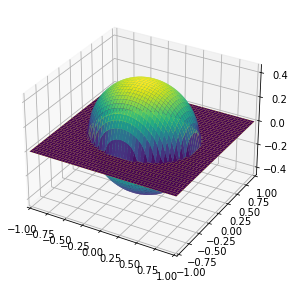

In [7]:
Z = solve(eq2, z1) 
display(Latex('z_1 = {0}\\\\z_2 = {1}'.format(*map(latex, Z))))
plot3d(*Z, (x1, -1, 1), (y1, -1, 1))

# График поверхности в Sympy
График поверхностив Sympy можно строить с помощью sympy.plotting.plot.plot3d(*args, show=True, **kwargs)

**Варианты использования:**

`plot3d((expr, range_x, range_y, **kwargs)`

Используется по умолчанию диапазон (-10, 10).

Несколько графиков в одном пространстве:

`plot3d(expr1, expr2, range_x, range_y, **kwargs)`

Несколько графиков с разными дапазонами значений переменных в одном пространстве:

`plot3d((expr1, range_x, range_y), (expr2, range_x, range_y), ..., **kwargs)`

**Аргументы:**

**expr** - выражение

**range_x(Symbol, float, float)** - 
кортеж, состоящий из переменной и ее минмального и максимального значений, например, (x, 0, 5).

**range_y(Symbol, float, float)** - 
кортеж, состоящий из переменной и ее минмального и максимального значений, например, (y, 0, 5).

**Ключевые аргументы:** 

аргументы класса SurfaceOver2DRangeSeries:

nb_of_points_x - число int, показывает число точек равномерной сетки в диапазоне значений $x$

nb_of_points_y - число int, показывает число точек равномерной сетки в диапазоне значений $y$

**Оформление:**

surface_color - цвет

Несколько графиков в одном вызове plot3d изображаются одним цветом

Аргументы класса Plot:

title - заголовок

size(float, float) - кортеж вида (width, height) ширины и высоты в дюймах.


### Пример 3.
Определить тип поверхности второго порядка, заданной уравнением
$$
3x^2 - 7y^2 + 3z^2 + 8xy - 8yz - 8xz + 10x - 14y - 6z - 8 = 0
$$
Вначале приведем к каноническому виду квадратичную форму $3x^2 - 7y^2 + 3z^2 + 8xy - 8yz - 8xz$.

In [8]:
A3 = Matrix(((3, 4, -4), (4, -7, -4), (-4, -4, 3)))
X3 = Matrix((x, y, z))
eq_f3 = (X.T * A3 * X)[0].expand().simplify()
display(Latex(f'A = {latex(A3)},\ квадратичная\ форма:\\\\{latex(eq_f3)}'))
P = Matrix([])
for item in A3.eigenvects():
    degree = item[1]
    for i in range(degree):
        P = P.row_join(item[2][i].normalized()) 
A3_new = P.T * A3 * P
x1, y1, z1 = symbols('x1 y1 z1')
X3_new = Matrix((x1, y1, z1))
q_f3_new = (X3_new.T * A3_new * X3_new)[0].expand().simplify()
display(Latex(f'A_{{new}} = {latex(A3_new)},\ квадратичная\ форма:\\\\{latex(q_f3_new)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Введем вектор-столбец линейной формы $b = (5, -7, -3)$ и умножим его слева на транспонированную матрицу перехода к базису из собственных векторов.

In [9]:
b = Matrix((5, -7, -3))
b_new = P.T * b
display(b_new)

Matrix([
[-6*sqrt(2)],
[   sqrt(2)],
[        -3]])

Составляем новое уравнение, не содержащее попарных произведений переменных, т.е. $x_1y_1$, $x_1z_1$ и $y_1z_1$:

In [10]:
c = -8
u_new = q_f3_new + 2 * (b_new.T * X3_new)[0]
display(Eq(u_new + c, 0))

Eq(-9*x1**2 - 12*sqrt(2)*x1 - y1**2 + 2*sqrt(2)*y1 + 9*z1**2 - 6*z1 - 8, 0)

Теперь нужно выделить полные квадраты.

Выделим полный квадрат в выражении $ax^2 + bx$:
$$
ax^2 + 2bx = a\left(x^2 + 2 \frac{b}{a}x + \frac{b^2}{a^2} - \frac{b^2}{a^2}\right)= a\left(x + \frac{b}{a}\right)^2 - \frac{b^2}{a}.
$$
В результате таких замен получается квадратичная форма с теми же коэффициентами, что и до выделения квадратов, но становится нулевой линейная часть, а свободный член вычисляется по остаткам $- \frac{b^2}{a}$.

Заметим, что вектор $b_{new}$ содержит коэффициенты при линейных членах квадратичной формы, а диагональные элементы матрицы $A_{new}$ являются коэффициентами при соответствующих квадратах.

In [11]:
c_new = c
for i in range(3):
    c_new -= b_new[i] ** 2 / (A3_new[i, i])
display(c_new)    

1

Новые переменные $x_2$, $y_2$, $z_2$ связаны с $x_1$, $y_1$, $z_1$ 
соотношениями
$$
x_2 = x_1 + \frac{b_1}{a_{11}}, \quad y_2 = y_1 + \frac{b_2}{a_{22}}, \quad z_2 = z_1 + \frac{b_3}{a_{33}}, 
$$
где $(b_1, b_2, b_2)$ - вектор $b_{new}$, $a_{ii}$, $i = 1, 2, 3$ - диагональные элементы матрицы $A_{new}$.

В новых переменных $x_2$, $y_2$, $z_2$ уравнение поверхности такое:

In [12]:
x2, y2, z2 = symbols('x2 y2 z2')
X3_last = Matrix((x2, y2, z2))
Eq((X3_last.T * A3_new * X3_last)[0] + c_new, 0)

Eq(-9*x2**2 - y2**2 + 9*z2**2 + 1, 0)

Для получения канонического уравнения осталось перенести свободный член в правую часть и поделить обе части на  свободный член с противоположным знаком, получим

In [13]:
eq3 = Eq((X3_last.T * A3_new * X3_last)[0] / (-c_new), 1)
display(eq3)

Eq(9*x2**2 + y2**2 - 9*z2**2, 1)

Получился однополостной гиперболоид.

<IPython.core.display.Latex object>

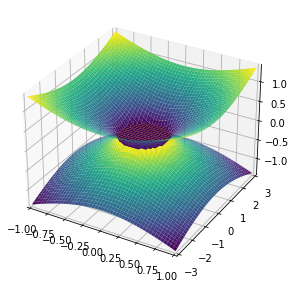

In [14]:
Z = solve(eq3, z2) 
display(Latex('z_1 = {0}\\\\z_2 = {1}'.format(*map(latex, Z))))
plot3d(*Z, (x2, -1, 1), (y2, -3, 3))

### Пример 4.
Привести уравнение поверхности второго порядка $x^2 + y^2 + 4z^2 + 2xy + 4xz + 4yz - 6z - 5 = 0$ к каноническому виду. Построить график.

In [15]:
A4 = Matrix(((1, 1, 2), (1, 1, 2), (2, 2, 4)))
X4 = Matrix((x, y, z))
P = Matrix([])
for item in A4.eigenvects():
    degree = item[1]
    for i in range(degree):
        P = P.row_join(item[2][i].normalized()) 
A4_new = P.T * A4 * P
x1, y1, z1 = symbols('x1 y1 z1')
X4_new = Matrix((x1, y1, z1))
q_f4_new = simplify(expand(X4_new.T * A4_new * X4_new))[0]
display(Latex(f'A_{{new}} = {latex(A4_new)},\ квадратичная\ форма:\ {latex(q_f4_new)}'))

<IPython.core.display.Latex object>

У матрицы квадратичной формы одно ненулевое собственное значение.
Пересчитаем вектор коэффициентов линейной формы:

In [16]:
b = Matrix((0, 0, -3))
b_new = P.T * b
u_new = q_f4_new + 2 * (b_new.T * X4_new)[0]
display(Latex(f'b_{{new}} = {latex(b_new)},\ квадратичная\ форма:\ {latex(u_new)}'))

<IPython.core.display.Latex object>

Видим, что только переменная $z_1$ входит в уравнение и во второй степени, и в первой, выделим полный квадрат и проведем замену переменной. При этом коэффициенты квадратичной формы останутся теми же, изменится только свободный член.

In [17]:
c_new = -5
c_new -= b_new[2] ** 2 / (A4_new[2, 2])
b_last = b_new
b_last[2] = 0
x2, y2, z2 = symbols('x2 y2 z2')
X4_last = Matrix((x2, y2, z2))
eq4 = Eq((X4_last.T * A4_new * X4_last)[0] + 2 * (b_last.T * X4_last)[0] + c_new, 0)
display(Latex(f'c_{{new}} = {latex(c_new)},\ уравнение:\ {latex(eq4)}'))

<IPython.core.display.Latex object>

Получился параболический цилиндр. Чтобы получить каноническое уравнение, достаточно выразить $z_2^2$ и провести замену переменной $y_2$, избавляющую от свободного члена:

In [18]:
Z = solve(eq4, z2 ** 2) 
display(Latex('z = {0}'.format(*map(latex, Z))))

<IPython.core.display.Latex object>

Для того, чтобы избавиться от свободного члена, проведем замену переменной $y_2 = y_3 - \sqrt{5}$:

In [19]:
y3 = Symbol('y3')
eq4 = Eq(z2 ** 2, simplify(expand(Z[0].subs(y2, y3 - 5 ** S.Half))))
eq4    

Eq(z2**2, sqrt(5)*y3/5)

Выразим с помощью solve $y_3$ из полученного уравнения и построим график:

<IPython.core.display.Latex object>

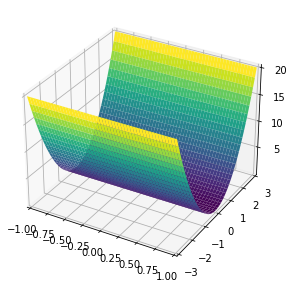

In [20]:
Y = solve(eq4, y3) 
display(Latex('y_3 = {0}'.format(*map(latex, Y))))
plot3d(*Y, (x2, -1, 1), (z2, -3, 3))

### Пример 5.
Привести уравнение поверхности второго порядка $x^2 + 5y^2 + z^2 + 2xy + 6xz + 2yz - 2x + 6y + 2z + 1 = 0$ к каноническому виду. Построить график.

In [21]:
A5 = Matrix(((1, 1, 3), (1, 5, 1), (3, 1, 1)))
X = Matrix((x, y, z))
b5 = Matrix((-1, 3, 1))
c5 = 1
u5 = simplify(expand(X.T * A5 * X))[0] + 2 * (b5.T * X)[0] + c
display(u5)
P = Matrix([])
for item in A5.eigenvects():
    degree = item[1]
    for i in range(degree):
        P = P.row_join(item[2][i].normalized()) 
A5_new = P.T * A5 * P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f5_new = simplify(expand(X_new.T * A5_new * X_new))[0]
display(A5_new, q_f5_new)

x**2 + 2*x*y + 6*x*z - 2*x + 5*y**2 + 2*y*z + 6*y + z**2 + 2*z - 8

Matrix([
[-2, 0, 0],
[ 0, 3, 0],
[ 0, 0, 6]])

-2*x1**2 + 3*y1**2 + 6*z1**2

In [22]:
b5_new = P.T * b5
display(b5_new)
u5_new = q_f5_new + 2 * (b5_new.T * X_new)[0]
display(u5_new)

Matrix([
[ sqrt(2)],
[-sqrt(3)],
[ sqrt(6)]])

-2*x1**2 + 2*sqrt(2)*x1 + 3*y1**2 - 2*sqrt(3)*y1 + 6*z1**2 + 2*sqrt(6)*z1

In [23]:
c5_new = c5
for i in range(3):
    c5_new -= b5_new[i] ** 2 / (A5_new[i, i])
display(c5_new)    

0

In [24]:
b5_last = zeros(3, 1)
x2, y2, z2 = symbols('x2 y2 z2')
X_last = Matrix((x2, y2, z2))
eq5 = Eq((X_last.T * A5_new * X_last)[0] + 2 * (b5_last.T * X_last)[0] + c5_new, 0)
display(eq5)

Eq(-2*x2**2 + 3*y2**2 + 6*z2**2, 0)

Получился конус. Чтобы построить график, достаточно выразить $x_2$:

<IPython.core.display.Latex object>

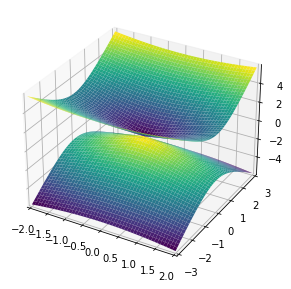

In [25]:
X5 = solve(eq5, x2) 
display(Latex('x_1 = {0}\\\\x_2 = {1}'.format(*map(latex, X5))))
plot3d(*X5, (y2, -2, 2), (z2, -3, 3))